<img src="https://www.mercari.com/assets/img/help_center/us/ogp.png"/>

# Mercari Price Suggestion Challenge
***
### Can you automatically suggest product prices to online sellers?

**Product pricing gets even harder at scale**, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

**Mercari**, Japan’s biggest community-powered shopping app, knows this problem deeply. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

In this competition, Mercari’s challenging you to **build an algorithm that automatically suggests the right product prices**. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

### Dataset Features

- **ID**: the id of the listing
- **Name:** the title of the listing
- **Item Condition:** the condition of the items provided by the seller
- **Category Name:** category of the listing
- **Brand Name:** brand of the listing
- **Shipping:** whether or not shipping cost was provided
- **Item Description:** the full description of the item
- **Price:** the price that the item was sold for. This is the target variable that you will predict. The unit is USD.

**Work on supply and demand**

**Source:** https://www.kaggle.com/c/mercari-price-suggestion-challenge

<img src = "https://cdn.dribbble.com/users/56196/screenshots/2281553/mobile-dribbble.gif"/>

# Representing and Mining Text
***
Since, text is the most **unstructured** form of all the available data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text pre-processing**.

### Fundamental Concepts 

The importance of constructing mining-friendly data representations; Representation of text for data mining. 

### Important Terminologies
- **Document**: One piece of text. It could be a single sentence, a paragraph, or even a full page report. 
- **Tokens**: Also known as terms. It is simply just a word. So many tokens form a document. 
- **Corpus**: A collection of documents. 
- **Term Frequency (TF)**: Measures how often a term is in a single document
- **Inverse Document Frequency (IDF)**: distribution of a term over a corpus

### Pre-Processing Techniques
- **Stop Word Removal:** stop words are terms that have little no meaning in a given text. Think of it as the "noise" of data. Such terms include the words, "the", "a", "an", "to", and etc...
- **Bag of Words Representation: ** treats each word as a feature of the document

- **TFIDF**: a common value representation of terms. It boosts or weighs words that have low occurences. For example, if the word "play" is common, then there is little to no boost. But if the word "mercari" is rare, then it has more boosts/weight. 

- **N-grams**: Sequences of adjacent words as terms. For example, since a word by itself may have little to no value, but if you were to put two words together and analyze it as a pair, then it might add more meaning. 

- **Stemming and Lemmatization**:

- **Named Entity Extraction**: A pre-processing technique used to know  when word sequences constitute proper names. Example, "HP", "H-P", and "Hewlett-Packard" all represent the Hewlett-Packard Corporation.

- **Topic Models**: A type of model that represents a set of topics from a sequence of words. 

<img src="http://www.des1gnon.com/wp-content/uploads/2017/02/Des1gn-ON-Tendencias-no-Design-em-2017-icones-03.gif"/>

# MileStone Report 
***

**A. Define the objective in business terms:** The objective is to come up with the right pricing algorithm that can we can use as a pricing recommendation to the users. 

**B. How will your solution be used?:** Allowing the users to see a suggest price before purchasing or selling will hopefully allow more transaction within Mercari's business. 

**C. How should you frame this problem?:** This problem can be solved using a supervised learning approach, and possible some unsupervised learning methods as well for clustering analysis. 

**D. How should performance be measured?:** Since its a regression problem, the evaluation metric that should be used is RMSE (Root Mean Squared Error). But in this case for the competition, we'll be using the 

**E. Are there any other data sets that you could use?:** To get a more accurate understanding and prediction for this problem, a potential dataset that we can gather would be more about the user. Features such as user location, user gender, and time could affect it.

## General Steps

1. Handle Missing Values — Replaced “missing” values with NA.

2. Lemmatization performed on item_description — Aiming to remove inflectional endings only and to return the base or dictionary form of a word

3. Label encoding has been performed on categorical values — Encode labels with value between 0 and n_classes-1.

4. Tokenization — Given a character sequence, tokenization is the task of chopping it up into pieces, called tokens and remove punctuation.

5. Maximum length of all sequences has been specified

6. Scaling performed on target variable (price)

7. Sentiment scored computed on item_description

8. Scaling performed on item description length as well



# Import Packages
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
from string import punctuation

In [3]:
# vstack - adds rows, hstack - adds columns
# csr_matrix - used to handle sparse matrix
from scipy.sparse import vstack, hstack, csr_matrix

In [4]:
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer

In [6]:
# Ridge - Reduces multicollinearity in regression. Applies L2 Regularization
from sklearn.linear_model import Ridge

# Import Train / Test Data
***

In [7]:
# Create training set
train = pd.read_csv('C:/Users/Randy/Desktop/training/train.tsv', sep = '\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [8]:
# Create testing set
test = pd.read_csv('C:/Users/Randy/Desktop/training/test.tsv', sep = '\t',engine = 'python')

In [9]:
# Create log price variable (Transformation)
y = np.log1p(train['price'])

# Combine Test and Train Set
***

In [10]:
# Create combined set. You would want to apply count vectorizer on combined set so you can get the list of all possible words.
combined = pd.concat([train,test])

# Create the submission set (Only contains the test ID)
submission = test[['test_id']]

# Create size of train
train_size = len(train)

In [11]:
combined.shape

(1286735, 9)

In [12]:
combined_ML = combined.sample(frac=0.1).reset_index(drop=True)

In [13]:
combined_ML.shape

(128674, 9)

# Part 2: Preparing the Corpus for Analysis
***

a. Remove Puncuations

b. Remove Digits

c. Remove stop words

d. Lower case words

e. Lemmatization or Stemming

##  Remove Puncuation 

In [14]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# Create a list of punctuation replacements
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

**Create a remove punctuation method**

In [16]:
import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

## Remove Digits

In [17]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

## Remove Stop Words

In [18]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

## Lower Case Words

In [19]:
def to_lower(x):
    return x.lower()

# Part 3: Explore Training Set
***

**MIssing Values:**
- Category_name
- Brand_name
- Item_description

**Categorical Variables (Need to do Encoding):** 
- name
- category_name
- brand_name
- item_description

**Check Missing Values**

In [20]:
train.count()

train_id             593376
name                 593376
item_condition_id    593376
category_name        590835
brand_name           340359
price                593376
shipping             593376
item_description     593375
dtype: int64

**Check Data Types**

In [21]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

## 3a. Price Distribution
***

**Why Do Price Vary?**
- Supply and Demand
- Brand Name
- Fabric Terms
- "Quality"-Type Words (Check to see if quality plays a role in price)
- Condition 


**Summary:**
- The mean price in the dataset is **26 Dollars**
- The median price in the dataset is **17 Dollars**
- The max price in the dataset is **2000 Dollars**
- Due to the skewed dataset, the **median** price is a more reliable price to gauge off of.

In [22]:
train.price.describe()

count    593376.000000
mean         26.689003
std          38.340061
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2000.000000
Name: price, dtype: float64

In [23]:
# Could we use these as features? Look at median price for each quantile
bins = [0, 10, 17, 29, 2001]
labels = ['q1','q2','q3','q4']
train['price_bin'] = pd.cut(train['price'], bins=bins, labels=labels)
train.groupby('price_bin')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_bin,,,,,,,,
q1,149944.0,7.710178,2.083100,3.0,6.0,8.0,10.0,10.0
q2,151863.0,13.834845,1.795258,10.5,12.0,14.0,15.0,17.0
q3,144043.0,22.539551,3.335075,17.5,20.0,22.0,25.0,29.0
q4,147215.0,63.396077,63.271190,30.0,35.0,45.0,66.0,2000.0


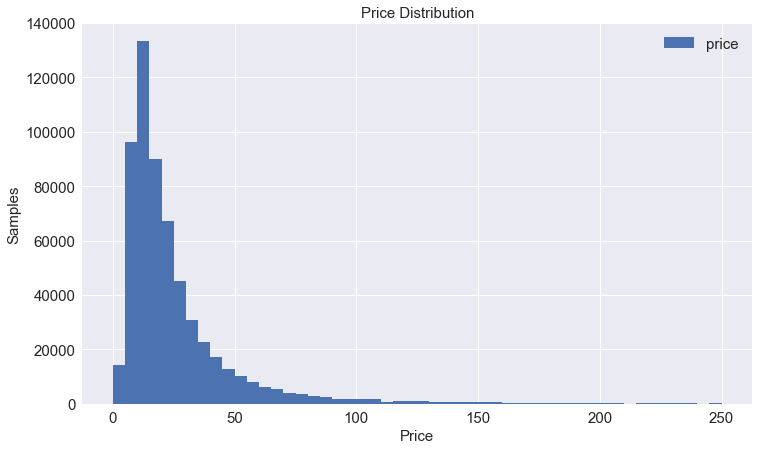

In [24]:
plt.figure(figsize=(12, 7))
plt.hist(train['price'], bins=50, range=[0,250], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

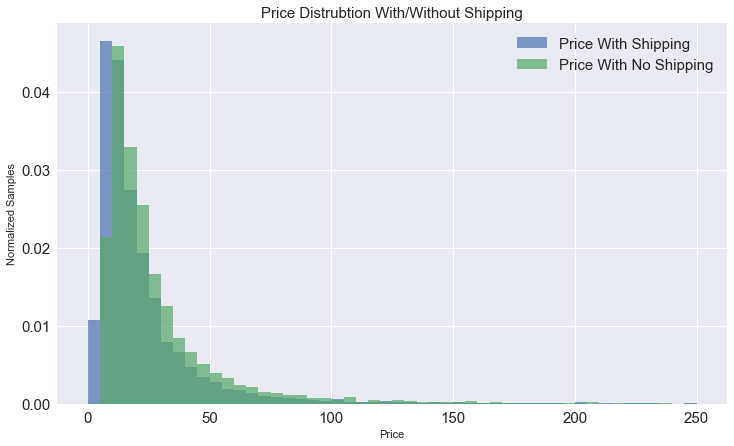

In [25]:
shipping = train[train['shipping']==1]['price']
no_shipping = train[train['shipping']==0]['price']

plt.figure(figsize=(12,7))
plt.hist(shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With No Shipping')
plt.title('Price Distrubtion With/Without Shipping', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

## 3b. Brand Analysis
***

In [26]:
# Amount of unique brand names
train['brand_name'].nunique()

3751

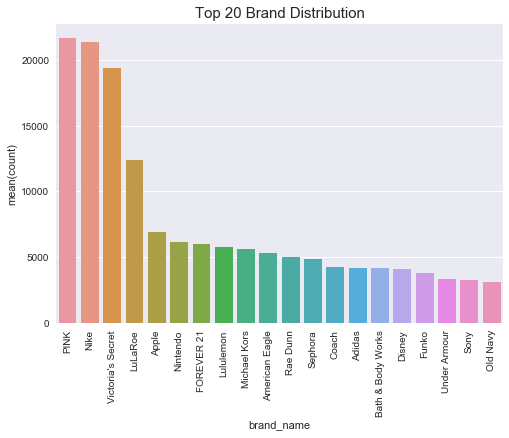

In [27]:
# Top 20 Brand Distribution
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

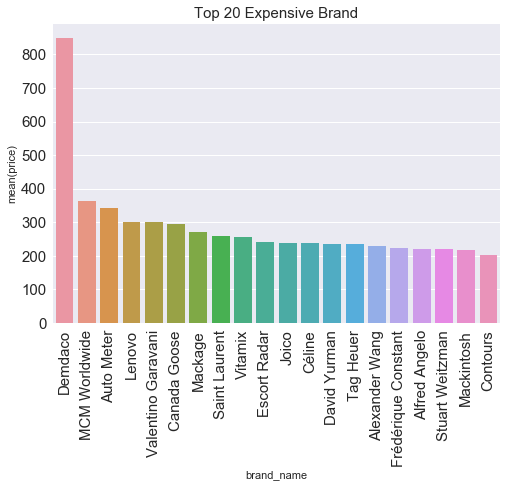

PINK                 0.063659
Nike                 0.062687
Victoria's Secret    0.056910
LuLaRoe              0.036462
Apple                0.020337
Nintendo             0.017958
FOREVER 21           0.017649
Lululemon            0.017047
Michael Kors         0.016415
American Eagle       0.015604
Rae Dunn             0.014676
Sephora              0.014303
Coach                0.012372
Adidas               0.012311
Bath & Body Works    0.012167
Disney               0.012014
Funko                0.011030
Under Armour         0.009807
Sony                 0.009587
Old Navy             0.009208
Hollister            0.008106
Carter's             0.007698
Urban Decay          0.007383
The North Face       0.007110
Too Faced            0.006828
Xbox                 0.006728
Independent          0.006711
MAC                  0.006514
Brandy Melville      0.006464
Kate Spade           0.006396
                       ...   
Sock It to Me        0.000003
Cocomo               0.000003
Onque Casu

In [28]:
# Display Top 20 Expensive Brands By Mean Price
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

# 3c. Category Distribution
***

In [29]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


## 3c. Main Category

**Interesting findings:**
- Women and Beauty take up majority of the distribution
- Women and Beauty take up 56% of the distribution

**Questions to ask:**
- Can we create a gender category (Female, Male, Nuetral). Example: Three categories means three gender types. If two of them are female, then we classify as a female purchaser. If two of them are male, then we classify as male. If male/female/neutral then?
- Does gender play a role in price?
- Can we create an age category? 

In [30]:
# Electronics have the highest std
train.groupby('category_main')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_main,,,,,,,,
Beauty,83315.0,19.727468,20.708703,0.0,10.0,15.0,24.0,1315.0
Electronics,47986.0,33.763889,63.485958,0.0,9.0,15.0,30.0,1909.0
Handmade,12257.0,18.325365,27.484725,0.0,6.0,12.0,20.0,906.0
Home,27331.0,24.845798,25.203925,0.0,12.0,18.0,29.0,848.0
Kids,68404.0,20.664983,22.877467,0.0,10.0,14.0,24.0,809.0
Men,37382.0,34.532369,39.729618,0.0,14.0,21.0,40.0,909.0
Other,18251.0,20.821434,31.046225,0.0,9.0,13.0,23.0,1400.0
Sports & Outdoors,9632.0,25.140365,27.388032,0.0,11.0,16.0,28.0,450.0
Vintage & Collectibles,18673.0,27.158732,52.338051,0.0,10.0,16.0,26.0,1709.0


In [31]:
# Display distribution
train['category_main'].value_counts(1)

Women                     0.451315
Beauty                    0.141427
Kids                      0.116116
Electronics               0.081456
Men                       0.063456
Home                      0.046394
Vintage & Collectibles    0.031697
Other                     0.030981
Handmade                  0.020806
Sports & Outdoors         0.016350
Name: category_main, dtype: float64

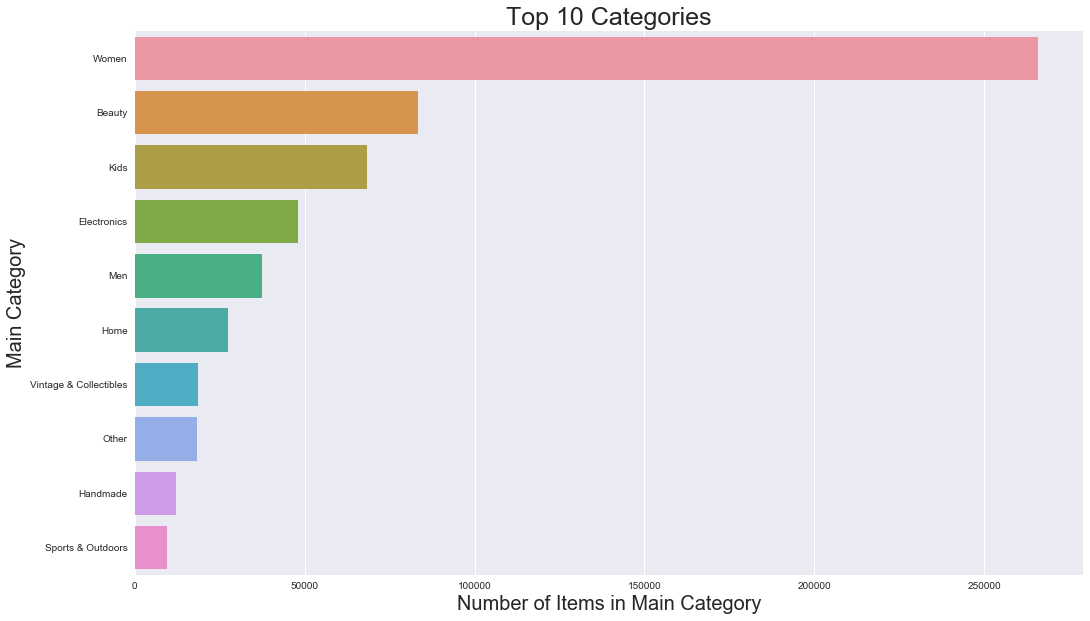

In [32]:
plt.figure(figsize=(17,10))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()

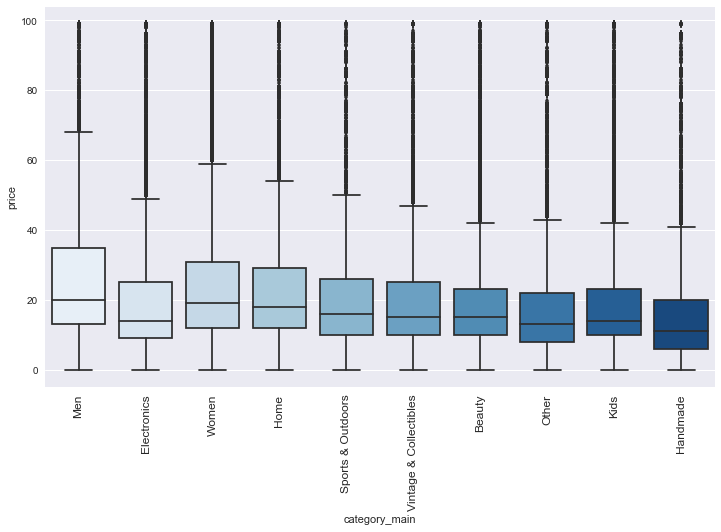

In [33]:
#main = pd.DataFrame(cat_train['category_main'].value_counts()).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
fig, axes = plt.subplots(figsize=(12, 7))
main = cat_train[cat_train["price"]<100]
# Use a color palette
ax = sns.boxplot( x=main["category_main"], y=main["price"], palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=12)

sns.plt.show()

In [34]:
# Create a "no_brand" column 
train['no_brand'] = train['brand_name'].isnull()

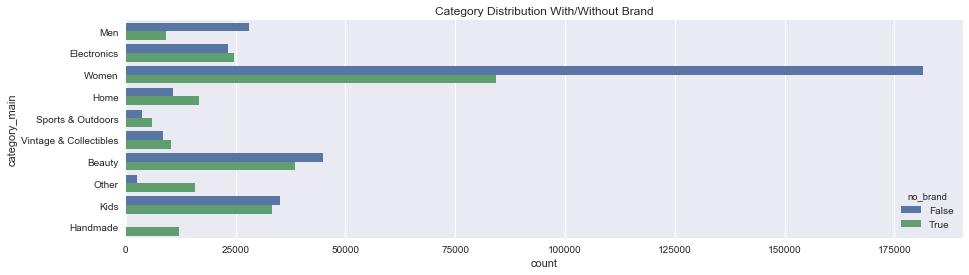

In [35]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='category_main', hue='no_brand', data=train).set_title('Category Distribution With/Without Brand');
plt.show()

## 3c. Category_2 Distribution


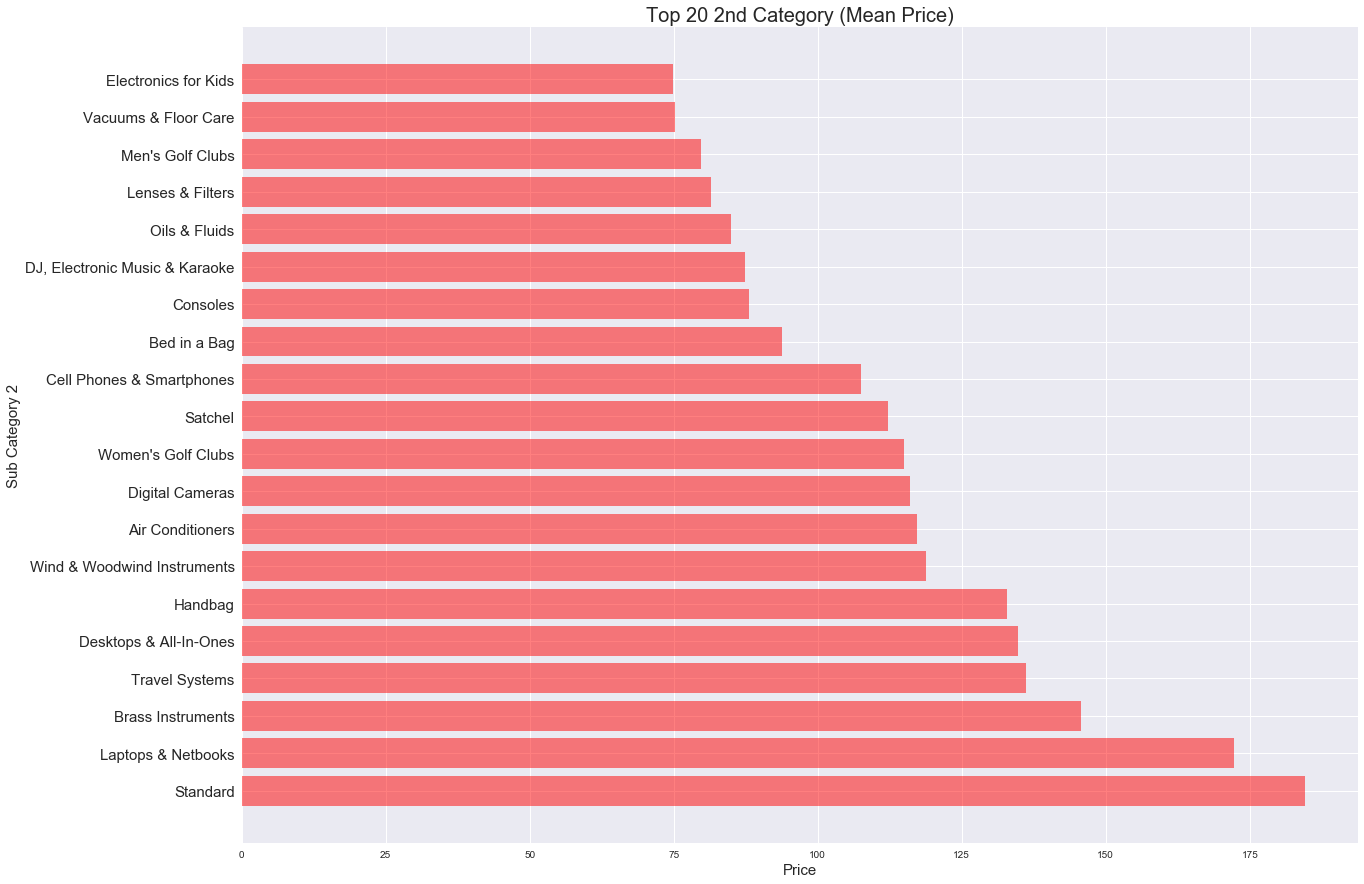

In [36]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()

## 3c. Category_1 Distribution 

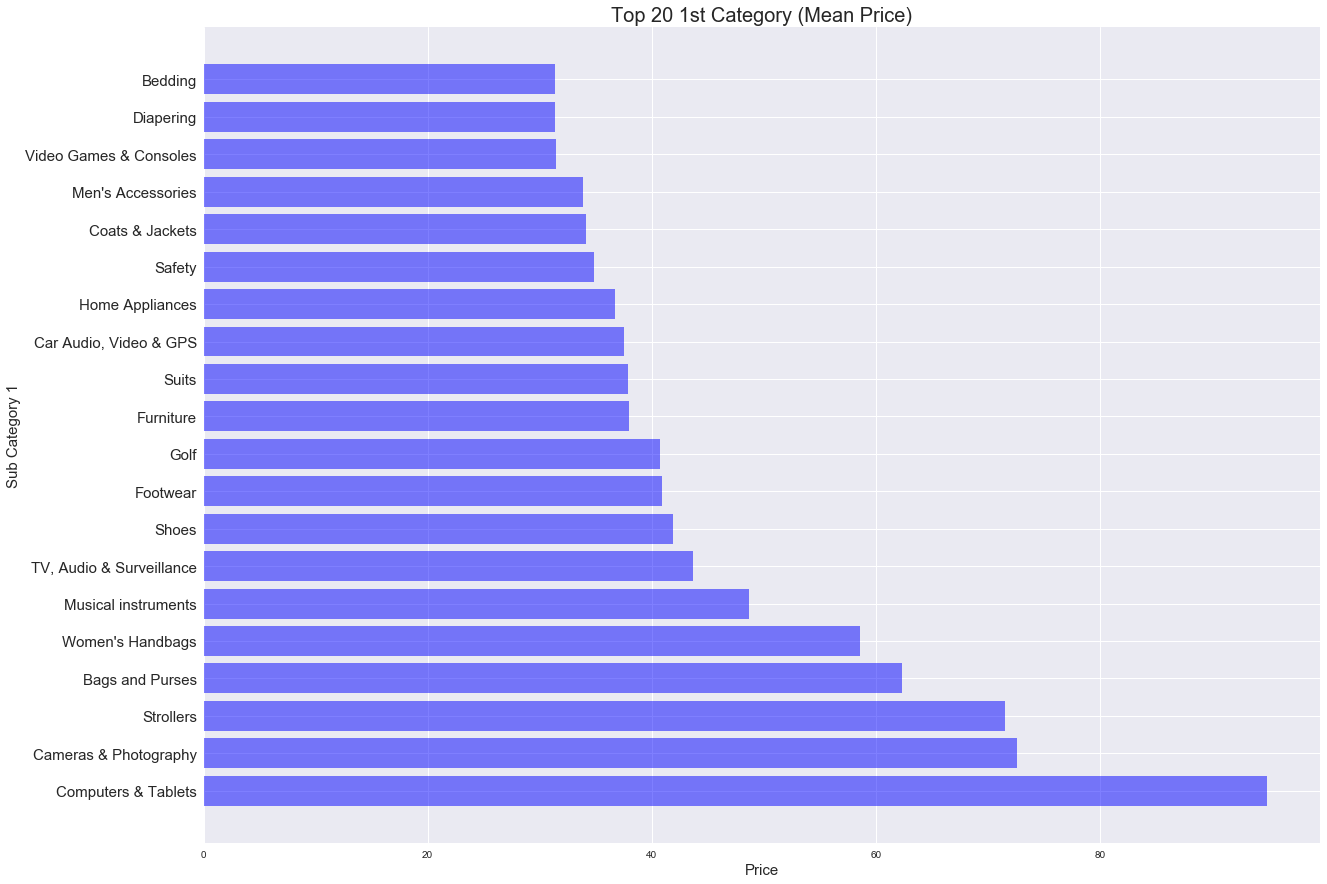

In [37]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()

## 3d. Item Description Analysis

**Hypothesis:** 
- Does length play a role in price?
- Does certain descriptions make a fake item?
- Lenghthier descriptions mean more effort in item, more authentic, more valuable?

In [38]:
# Remove Punctuation
combined.item_description = combined.item_description.astype(str)

descr = combined[['item_description', 'price']]
descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))

descr['item_description'] = descr['item_description'].apply(remove_digits)
descr['item_description'] = descr['item_description'].apply(remove_punctuation)
descr['item_description'] = descr['item_description'].apply(remove_stop_words)
descr.head(3)

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,item_description,price,count
0,description yet,10.0,18
1,keyboard great condition works like came box p...,52.0,188
2,adorable top hint lace key hole back pale pink...,10.0,124


In [39]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

descr['item_description'] = descr['item_description'].apply(porter.stem)

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
descr.tail(10)

,item_description,price,count
693349,â�—ï¸�listing â�—ï¸� brand new shades piu scar...,NaN,71
693350,rm free shipping new highly addict,NaN,47
693351,purple boys polo shirt size old navy never worn,NaN,59
693352,express deep olive green cardigan ultra thin ...,NaN,121
693353,shade medium neutral barley us,NaN,41
693354,flintquartz cluster self mined âœ¨measures xin...,NaN,243
693355,cosmetics travel bundle includes brow power un...,NaN,968
693356,new free shipping basstop cas,NaN,31
693357,floral kimono tropical print open front hi low...,NaN,94
693358,floral scrub tops worn less times brown belt ti,NaN,71


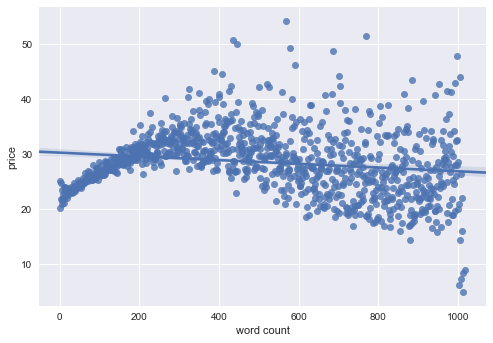

In [41]:
df = descr.groupby('count')['price'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["price"]))
plt.xlabel("word count")
plt.show()

# Create Pre-Processing Functions
***

In [42]:
combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.0,1,NaN,0.0
1,Razer,Electronics/Computers & Tablets/Components & P...,3,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard,52.0,0,NaN,1.0
2,Target,Women/Tops & Blouses/Blouse,1,Adorable top with a hint of lace and a key hol...,AVA-VIV Blouse,10.0,1,NaN,2.0
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues,35.0,1,NaN,3.0
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.0,0,NaN,4.0


In [43]:
# handle_missing_values - Basic data imputation of missing values
def handle_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)

In [44]:
# to_categorical - Converts Categorical Features 
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')

# Apply Pre-Processing Functions
***

In [45]:
# Applying the pre-processing functions
handle_missing_values(combined)
to_categorical(combined)

In [46]:
# apply the pre-processing function to ML combined
handle_missing_values(combined_ML)
to_categorical(combined_ML)

In [47]:
# Remove Punctuation
combined_ML.item_description = combined_ML.item_description.astype(str)

combined_ML['item_description'] = combined_ML['item_description'].apply(remove_digits)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_punctuation)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_stop_words)
combined_ML['item_description'] = combined_ML['item_description'].apply(to_lower)

combined_ML['name'] = combined_ML['name'].apply(remove_digits)
combined_ML['name'] = combined_ML['name'].apply(remove_punctuation)
combined_ML['name'] = combined_ML['name'].apply(remove_stop_words)
combined_ML['name'] = combined_ML['name'].apply(to_lower)

combined_ML.head(3)

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,Rue21,Women/Skirts/Maxi,2,wore big size small normally wear extra small ...,maxi skirt,22.0,0,NaN,538425.0
1,PINK,"Women/Tops & Blouses/Tank, Cami",3,pink size xs racerback free shipping,vs pink dark maroon tank,NaN,1,366252.0,NaN
2,LuLaRoe,"Women/Athletic Apparel/Pants, Tights, Leggings",1,description yet,lularoe xl irma tc leggings,NaN,0,311147.0,NaN


In [48]:
# Remove Punctuation
combined.item_description = combined.item_description.astype(str)

combined['item_description'] = combined['item_description'].apply(remove_digits)
combined['item_description'] = combined['item_description'].apply(remove_punctuation)
combined['item_description'] = combined['item_description'].apply(remove_stop_words)
combined['item_description'] = combined['item_description'].apply(to_lower)

combined['name'] = combined['name'].apply(remove_digits)
combined['name'] = combined['name'].apply(remove_punctuation)
combined['name'] = combined['name'].apply(remove_stop_words)
combined['name'] = combined['name'].apply(to_lower)

# Create three new features from Categories (Main, Sub1, Sub2)
***

In [49]:
combined.isnull().any()

brand_name           False
category_name        False
item_condition_id    False
item_description     False
name                 False
price                 True
shipping             False
test_id               True
train_id              True
dtype: bool

In [50]:
combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,None,Men/Tops/T-shirts,3,description yet,mlb cincinnati reds shirt size xl,10.0,1,NaN,0.0
1,Razer,Electronics/Computers & Tablets/Components & P...,3,keyboard great condition works like came box p...,razer blackwidow chroma keyboard,52.0,0,NaN,1.0
2,Target,Women/Tops & Blouses/Blouse,1,adorable top hint lace key hole back pale pink...,avaviv blouse,10.0,1,NaN,2.0
3,None,Home/Home Décor/Home Décor Accents,1,new tags leather horses retail rm stand foot h...,leather horse statues,35.0,1,NaN,3.0
4,None,Women/Jewelry/Necklaces,1,complete certificate authenticity,k gold plated rose,44.0,0,NaN,4.0


In [51]:
combined_ML.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,Rue21,Women/Skirts/Maxi,2,wore big size small normally wear extra small ...,maxi skirt,22.0,0,NaN,538425.0
1,PINK,"Women/Tops & Blouses/Tank, Cami",3,pink size xs racerback free shipping,vs pink dark maroon tank,NaN,1,366252.0,NaN
2,LuLaRoe,"Women/Athletic Apparel/Pants, Tights, Leggings",1,description yet,lularoe xl irma tc leggings,NaN,0,311147.0,NaN
3,None,Beauty/Hair Care/Shampoo & Conditioner Sets,1,silk express shampoo silk conditioner leave co...,silk express hair products,NaN,0,280598.0,NaN
4,Sephora,Beauty/Makeup/Face,1,deluxe samples ysl smashbox hourglass biossance,bundle es everythings,NaN,1,216302.0,NaN


In [52]:
combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,None,Men/Tops/T-shirts,3,description yet,mlb cincinnati reds shirt size xl,10.0,1,NaN,0.0
1,Razer,Electronics/Computers & Tablets/Components & P...,3,keyboard great condition works like came box p...,razer blackwidow chroma keyboard,52.0,0,NaN,1.0
2,Target,Women/Tops & Blouses/Blouse,1,adorable top hint lace key hole back pale pink...,avaviv blouse,10.0,1,NaN,2.0
3,None,Home/Home Décor/Home Décor Accents,1,new tags leather horses retail rm stand foot h...,leather horse statues,35.0,1,NaN,3.0
4,None,Women/Jewelry/Necklaces,1,complete certificate authenticity,k gold plated rose,44.0,0,NaN,4.0


# Apply CountVectorizer / TfidfVectorizer / LabelBinarizer
***

Encode labels into categorical variables: Pandas factorize and scikit-learn LabelEncoder. 
- The result will have 1 dimension.

Encode categorical variable into dummy/indicator (binary) variables: Pandas get_dummies and scikit-learn OneHotEncoder.
- The result will have n dimensions, one by distinct value of the encoded categorical variable.

# Create new Feature (Binning Price Into Two Categories)

In [53]:
#bins = [0, 64, 5000]
#labels = ['less','more']
#combined['lt65'] = pd.cut(combined['price'], bins=bins, labels=labels)

combined.head()

,brand_name,category_name,item_condition_id,item_description,name,price,shipping,test_id,train_id
0,None,Men/Tops/T-shirts,3,description yet,mlb cincinnati reds shirt size xl,10.0,1,NaN,0.0
1,Razer,Electronics/Computers & Tablets/Components & P...,3,keyboard great condition works like came box p...,razer blackwidow chroma keyboard,52.0,0,NaN,1.0
2,Target,Women/Tops & Blouses/Blouse,1,adorable top hint lace key hole back pale pink...,avaviv blouse,10.0,1,NaN,2.0
3,None,Home/Home Décor/Home Décor Accents,1,new tags leather horses retail rm stand foot h...,leather horse statues,35.0,1,NaN,3.0
4,None,Women/Jewelry/Necklaces,1,complete certificate authenticity,k gold plated rose,44.0,0,NaN,4.0


In [54]:
# Apply Count Vectorizer to "name", this converts it into a sparse matrix 
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(combined['name'])
X_name

<1286735x15973 sparse matrix of type '<class 'numpy.int64'>'
	with 4789374 stored elements in Compressed Sparse Row format>

In [55]:
# Apply Count Vectorizer to "category_name", this converts it into a sparse matrix
cv = CountVectorizer()
X_category = cv.fit_transform(combined['category_name'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_category

<1286735x1007 sparse matrix of type '<class 'numpy.int64'>'
	with 5165431 stored elements in Compressed Sparse Row format>

In [56]:
# Apply TFIDF to "item_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(combined['item_description'])

In [57]:
# Apply LabelBinarizer to "brand_name"
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(combined['brand_name'])

# Create CSR_Matrix & Merge the Sparse Matrices
***

In [58]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

# Train and Test Split
***

In [59]:
X_train_sparse = sparse_merge[:train_size]

X_test = sparse_merge[train_size:]

#X_train = sparse_merge[:len(combined_ML)]

#X_test = sparse_merge[len(combined_ML):]

In [60]:
combined.columns

Index(['brand_name', 'category_name', 'item_condition_id', 'item_description',
       'name', 'price', 'shipping', 'test_id', 'train_id'],
      dtype='object')

## Cross Validation

<img src="https://cdn-images-1.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png"/>

In [61]:
from sklearn.cross_validation import KFold
eval_size = .10
kf = KFold(len(y), round(1. / eval_size))
train_indicies, valid_indicies = next(iter(kf))
X_train, y_train = X_train_sparse[train_indicies], y[train_indicies]
X_valid, y_valid = X_train_sparse[valid_indicies], y[valid_indicies]

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Creat RMSLE Function

Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. **This means the RMSE should be more useful when large errors are particularly undesirable.**

RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

In [62]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## Train with LGBM

The reason why I used this algorithm is because it’s a good model to use on big data sets. 

It has fast:
- training sped and high efficiency
- low memory usage
- good accuracy
- good compatibility with large datasets. 

The RMSLE of LGBM is: **0.5406**

In [63]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [64]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [65]:
#Prediction
lgbm_pred=clf.predict(X_valid)

In [66]:
# Transform the prices back to its original price
np.expm1(lgbm_pred)

array([ 10.7214129 ,  29.60000413,  13.02518987, ...,  12.85446125,
        19.31981685,  15.34901857])

In [69]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_valid), np.expm1(lgbm_pred))))

[0.0] LGBM completed.
LGBM rmsle: 0.540597319376


## Train with Ridge Regression

The RMSLE of Ridge Regression is: **0.4829**

In [70]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_valid)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_valid), np.expm1(preds_valid))))

Fitting Ridge Model
[32.998536586761475] Ridge completed.
Ridge rmsle: 0.482907420753


In [71]:
np.expm1(preds_valid)

array([  9.09673618,  83.84303118,  11.78868638, ...,  12.66779351,
        23.59042071,  11.21630299])

# Interesting Note

The feature **'lt65'** that I created made a significant impact on the model's performance. I binned the items into either two categories based on their price: 'Less than 65' or 'More than 65'. 

The **Ridge Regression** model's RMSLE dropped from **.4829** to **.4215** with the addition of this feature.

The **LGBM** model's RMSLE dropped from **.5406** to **.4533**

## Predict on Test Set

In [72]:
# Predicting on never seen test set
preds = model.predict(X_test)

submission["price"] = np.expm1(preds)
submission.to_csv("submission_ridge.csv", index = False)

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [73]:
submission

,test_id,price
0,0,11.162749
1,1,12.555600
2,2,53.157534
3,3,17.925542
4,4,7.363347
5,5,9.959583
6,6,9.521093
7,7,33.185204
8,8,45.666661
9,9,6.283195


# LeaderBoard Result (Top 36%)

<img src = "http://i63.tinypic.com/14ccuv6.jpg" /img>

# Conclusion 
***

I am happy to have done this competition because it has opened up my mind into the realm of NLP and it showed me how much pre-processing steps are involved for text data. I learned the most common steps for text pre-processing and this allowed me to prepare myself for future work whenever I’m against text data again. Another concept that I really learned to value more is the choice of algorithms and how important computation is whenever you’re dealing with large datasets. It took me a couple of minutes to even perform some data visualizations and modeling. Text data is everywhere and it can get messy. Understanding the fundamentals on how to tackle these problems will definitely help me out in the future.